In [38]:
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import numpy as np 
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
df = pd.read_csv('Auto.csv',na_values='?')
df=df.dropna()
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0    3504          12.0    70   
1    15.0          8         350.0       165.0    3693          11.5    70   
2    18.0          8         318.0       150.0    3436          11.0    70   
3    16.0          8         304.0       150.0    3433          12.0    70   
4    17.0          8         302.0       140.0    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0        86.0    2790          15.6    82   
393  44.0          4          97.0        52.0    2130          24.6    82   
394  32.0          4         135.0        84.0    2295          11.6    82   
395  28.0          4         120.0        79.0    2625          18.6    82   
396  31.0          4         119.0        82.0    2720          19.4    82   

     origin                       name  
0         1  chevrolet

In [7]:
df['mpg'] = pd.to_numeric(df['mpg'])
df['horsepower'] = pd.to_numeric(df['horsepower'])

print(df[['mpg','horsepower']].dtypes)

mpg           float64
horsepower    float64
dtype: object


In [8]:
Y=df['mpg']
X=df['horsepower']
X = sm.add_constant(X)#for intercept
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        18:35:59   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

## 1.Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output. For example:

#### 1.Is there a relationship between the predictor and the response? Ans: Yes there is a strong relationship between predictor (horsepower) and response (mpg).
#### 2. How strong is the relationship between the predictor and the response? Ans: The relationship between predictor and the response is strong. R^2=0.606=60,6% which means 60% of changes is mpg can be explained by horsepower. 
#### 3. Is the relationship between the predictor and the response positive or negative? Ans: The relationship is negative in the row coef we can see that for predictor horsepower it is negative -0.1578 which means for every extra horsepower mpg drops by -0.1578. 
#### 4. What is the predicted mpg associated with a horsepower of 98? Ans: Predicted mpg when horsepower 98: 24.47

In [9]:
pred = model.predict([1,98])# for the intersecpt we mul by 1 
print(f"Predicted mpg when horsepower 98: {pred[0]:.2f}")

Predicted mpg when horsepower 98: 24.47


#### 5.What is the value of the coefficient of determination (R2)? Interpret its meaning in this context. Ans: Here R^2 is 0.606 = 60.6%. It means the model explains 60% of changes mpg based on horsepower.
#### 6. According to the p-value of the predictor, is the horsepower statistically significant at the 5% level? Ans: Yes for the p we have value 0.000 so it is less than 0,05. And for  horsepower it is statistically significant and it is truly affecting to the mpg, not just by chance. 



In [21]:
y_true = df['mpg']
y_pred = model.predict(sm.add_constant(df['horsepower']))
are = np.mean(np.abs(y_true - y_pred) / y_true)
print(f' Average Relative Error  {are}')
print(f' As presentage {are*100}%')

 Average Relative Error  0.17589272791833485
 As presentage 17.589272791833483%


In [26]:
mean_y = df['mpg'].mean()
avrg_error = model.mse_resid**0.5
print(f'mean of mpg {mean_y}')
print(f'standard error {avrg_error}')
print(f'{(avrg_error/mean_y)*100}%')


mean of mpg 23.445918367346938
standard error 4.90575691954594
20.923714066914833%


#### 6.Compare the standard error of the estimate to the mean of mpg.What does this tell you about the model’s accuracy? Ans: The standart errror is about 21% of the mean mpg. This means the model's prediction not bad, on a avarege, predictions are good but not perfect

## 2. Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function to display the least squares regression line.

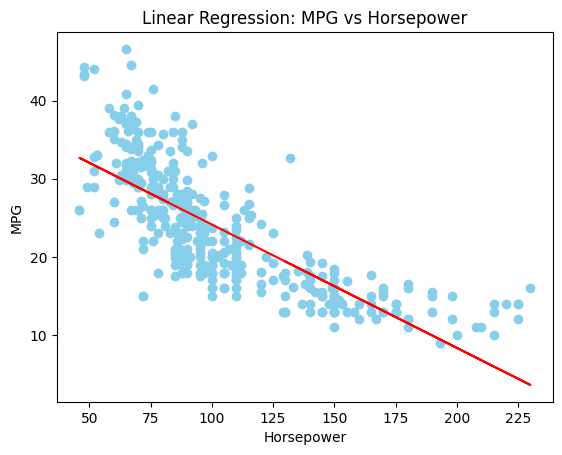

In [28]:
plt.scatter(df['horsepower'], df['mpg'], color='skyblue')
plt.plot(df['horsepower'], model.predict(X), color='red')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Linear Regression: MPG vs Horsepower')
plt.show()


# 3.

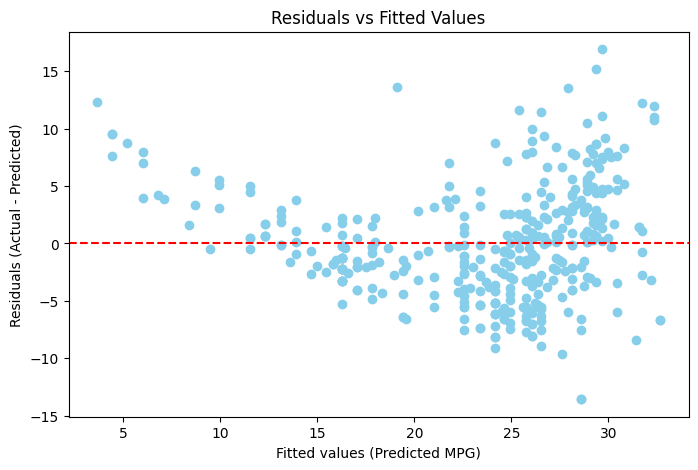

In [29]:
fitted_values = model.fittedvalues   
residuals = model.resid  
plt.figure(figsize=(8,5))
plt.scatter(fitted_values, residuals, color='skyblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values (Predicted MPG)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Fitted Values')
plt.show()

### Curved pattern suggests the relationship is nonlinear,so the linear model may not describe the data well.

# 4. and 5.

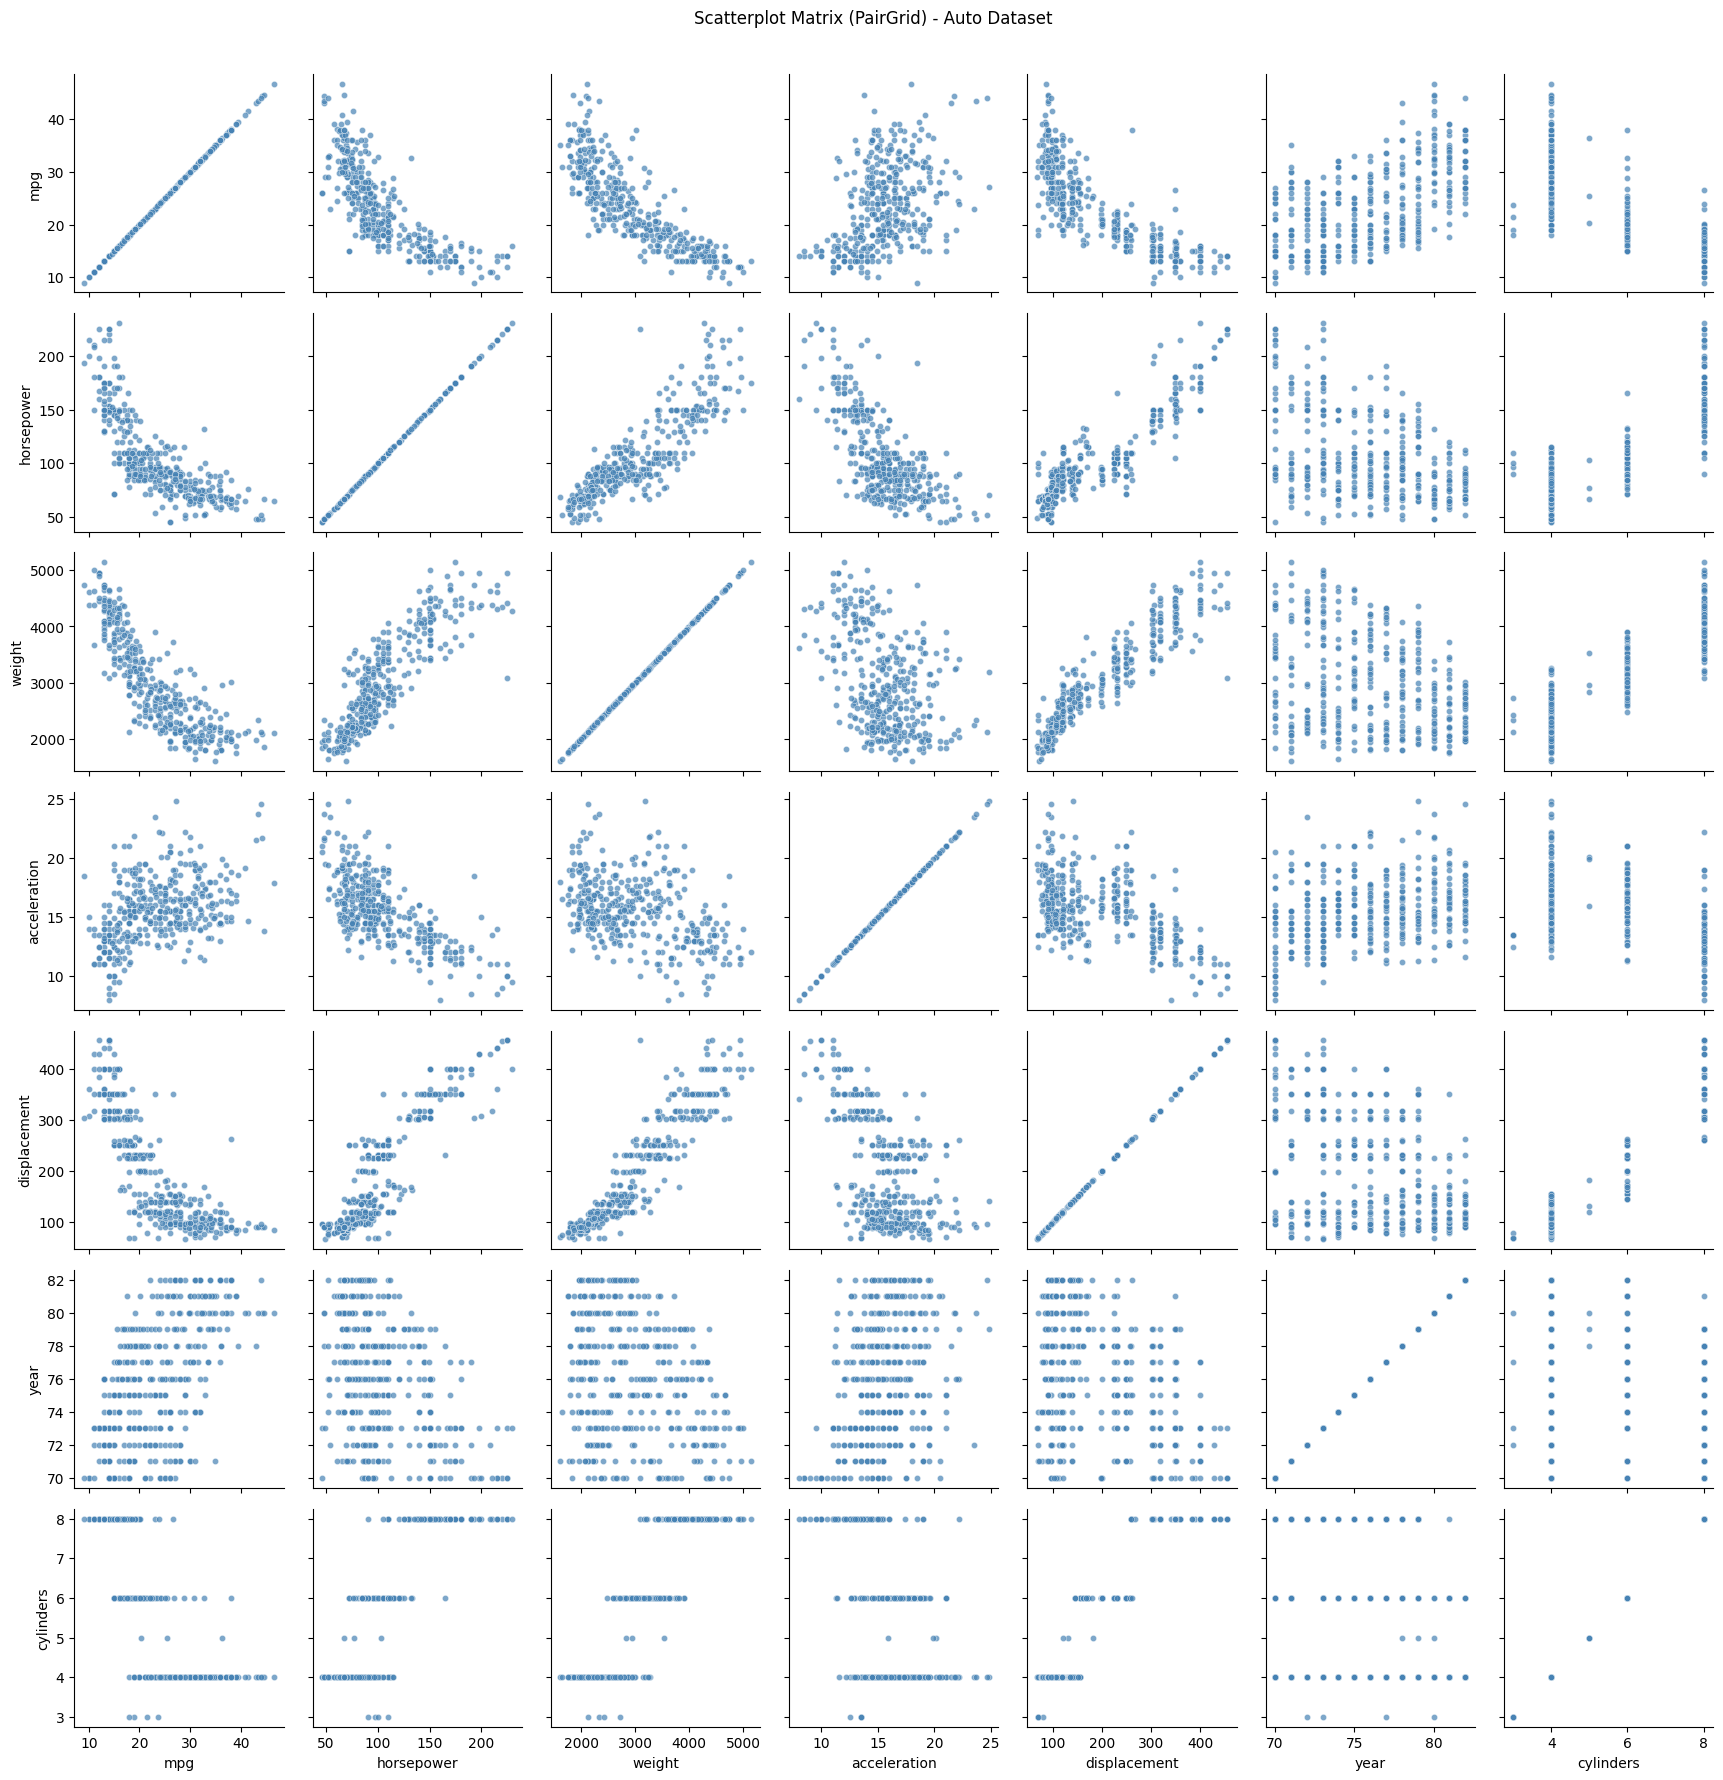

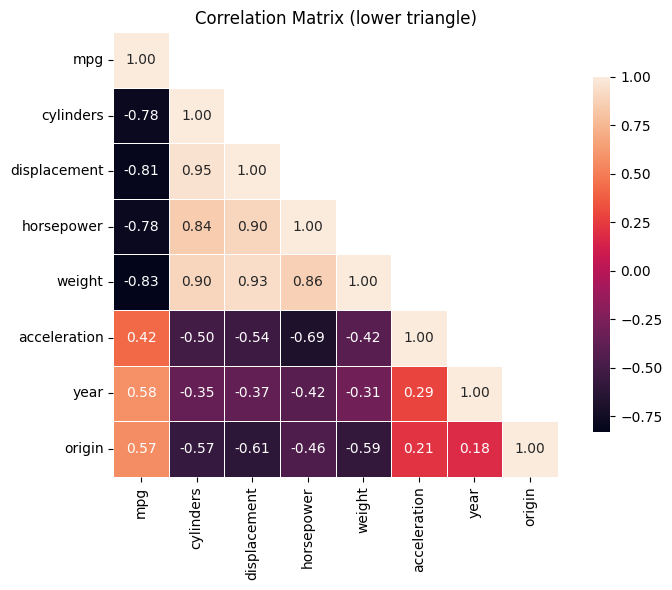

In [34]:
g = sns.PairGrid(df, vars=['mpg', 'horsepower', 'weight', 'acceleration', 'displacement', 'year', 'cylinders'])
g.map(sns.scatterplot, color='steelblue', s=20, alpha=0.7)
plt.suptitle("Scatterplot Matrix (PairGrid) - Auto Dataset", y=1.02)
plt.show()



corr = num.corr()

plt.figure(figsize=(8,6))
mask = pd.DataFrame(False, index=corr.index, columns=corr.columns)
mask.values[np.triu_indices_from(mask, 1)] = True  # show lower triangle
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linewidths=0.5,
            square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix (lower triangle)")
plt.tight_layout()
plt.show()

In [37]:
model_mlr = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin',data=df).fit()

print(model_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 21 Oct 2025   Prob (F-statistic):          2.04e-139
Time:                        19:27:55   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

#### 1. Is there a relationship between the predictors and mpg? Yes. The overall F-test is significant and the model explains a lot of variance R2 0.8. This means the predictors, taken together, are strongly related to mpg.
#### Predictors with p-value < 0.05 are significant. From my output, these are: [list the ones with p<0.05, e.g., weight (−), horsepower (−), year (+), origin (+)].Predictors with p ≥ 0.05 are not significant in this model: [list them, e.g., cylinders, displacement, acceleration] (likely due to overlap/multicollinearity with other variables).
#### The coefficient for year is b_year and it’s positive/negative. Holding all other variables constant, each additional model year increases mpg by about b_year mpg (if positive).

# 7) Residual plot + outliers + MSE/RMSE/MAE

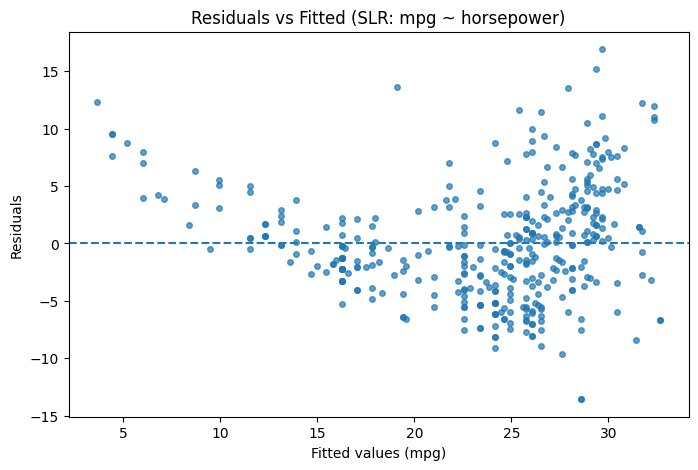

(array([320, 327]), 2)

In [39]:
fitted = model.fittedvalues
resid = model.resid

plt.figure(figsize=(8,5))
plt.scatter(fitted, resid, s=16, alpha=0.7)
plt.axhline(0, ls='--')
plt.xlabel("Fitted values (mpg)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (SLR: mpg ~ horsepower)")
plt.show()

std_resid = (resid - np.mean(resid)) / np.std(resid, ddof=1)
outlier_idx = np.where(np.abs(std_resid) > 3)[0] 
outlier_idx[:10], len(outlier_idx)


#### The residuals are mostly scattered randomly around zero, showing a good linear fit. No large outliers are visible.RMSE is the most useful measure since it’s in mpg units and shows average prediction error. MAE is better only if strong outliers exist.

In [40]:
y_true = df['mpg'].astype(float)
y_pred = fitted

MSE  = mean_squared_error(y_true, y_pred)
RMSE = np.sqrt(MSE)
MAE  = mean_absolute_error(y_true, y_pred)

print(f"MSE : {MSE:.3f}")
print(f"RMSE: {RMSE:.3f}")
print(f"MAE : {MAE:.3f}")

MSE : 23.944
RMSE: 4.893
MAE : 3.828


#### RMSE (same units as mpg) is widely used and penalizes big errors more—good if large mistakes matter.

#### MAE is more robust to outliers and easy to interpret as “average absolute error in mpg.”

#### If you see outliers or heteroscedasticity, prefer MAE; otherwise RMSE is a solid default.

In [41]:
num = df[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']].astype(float).copy()
formula_int = """
mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin
      + horsepower:weight + displacement:weight + year:origin
"""

model_int = smf.ols(formula_int, data=num).fit()
print(model_int.summary())

# Quick list of significant interaction terms
sig_interactions = model_int.pvalues[model_int.pvalues < 0.05].sort_values()
sig_interactions[sig_interactions.index.str.contains(':')]

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     243.8
Date:                Tue, 21 Oct 2025   Prob (F-statistic):          8.45e-159
Time:                        19:47:36   Log-Likelihood:                -968.91
No. Observations:                 392   AIC:                             1960.
Df Residuals:                     381   BIC:                             2004.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              18.4732    

year:origin          0.008606
horsepower:weight    0.027109
dtype: float64

#### If a term has p < 0.05, say “the interaction is statistically significant,” meaning the effect of one predictor depends on the level of the other.

In [42]:
model_poly = smf.ols('mpg ~ horsepower + I(horsepower**2)', data=num).fit()
model_logx = smf.ols('mpg ~ np.log(horsepower) + np.log(weight) + year + origin', data=num).fit()
model_sqrtx = smf.ols('mpg ~ np.sqrt(horsepower) + np.sqrt(weight) + year + origin', data=num).fit()

def quick_report(m, name):
    rmse = np.sqrt(np.mean((m.fittedvalues - num['mpg'])**2))
    print(f"{name:15s}  R2={m.rsquared:.3f}  AdjR2={m.rsquared_adj:.3f}  RMSE={rmse:.3f}  AIC={m.aic:.1f}")

quick_report(model,      "Linear (hp)")
quick_report(model_poly, "Poly hp^2")
quick_report(model_logx, "LogX")
quick_report(model_sqrtx,"SqrtX")

Linear (hp)      R2=0.606  AdjR2=0.605  RMSE=4.893  AIC=2361.3
Poly hp^2        R2=0.688  AdjR2=0.686  RMSE=4.357  AIC=2272.4
LogX             R2=0.845  AdjR2=0.844  RMSE=3.066  AIC=2000.8
SqrtX            R2=0.833  AdjR2=0.831  RMSE=3.186  AIC=2030.9


#### f Poly hp² improves Adj. R² and lowers RMSE/AIC, it suggests nonlinearity w.r.t. horsepower.

#### If LogX or SqrtX improves fit and the residual plot looks more random, the transformation helps stabilize variance / linearize relations.

#### Pick the model with higher Adj. R², lower RMSE/AIC, and cleaner residuals.